# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [1]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [3]:
conn = psycopg2.connect(host="localhost",database="empresa", user="postgres", password="123456")

# Relatórios

## Relatório 1
### Objetivo: Obter relatório que mostre o nome de cada supervisor(a) e a quantidade de empregados supervisionados.
Código para obtenção do resultado:

In [4]:
res = pd.read_sql_query("""
                           select nome, count(rg_supervisor) as qtd_supervisionados
                            from empregado as e 
                            inner join empregado_projeto ep 
                            on e.rg = ep.rg_empregado 
                            group by nome
                            """,conn)
res

,nome,qtd_supervisionados
0,Fernanda,2
1,Renata,1
2,Jorge,1
3,Ricardo,1
4,João Antonio,1


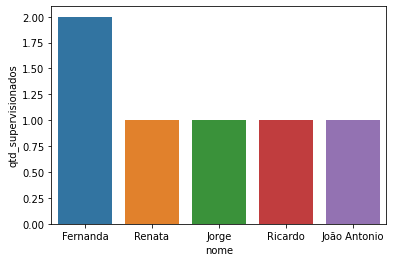

In [5]:
sns.barplot(x='nome',y='qtd_supervisionados',data=res)

# ==========================================================================================
## Relatório 2
### Objetivo: Obter relatório relativo aos os supervisores e supervisionados. O resultado deve conter o nome do supervisor e nome do supervisionado além da quantidade total de horas que cada supervisionado tem alocada aos projetos existentes na empresa.
Código para obtenção do resultado:

In [6]:
res = pd.read_sql_query("""select emp1.nome as supervisor, emp2.nome as supervisionado,sum(ep.horas)
                            from empregado as emp1 inner join empregado as emp2
                            on emp1.rg = emp2.rg_supervisor
                            left join empregado_projeto as ep 
                            on emp2.rg=ep.rg_empregado
                            group by emp1.nome,emp2.nome 
                            """,conn)
res

,supervisor,supervisionado,sum
0,Ricardo,Jorge,50.0
1,Fernanda,Ricardo,35.0
2,João Luiz,Fernanda,35.0
3,Fernanda,Luiz Renato,NaN
4,Ricardo,Renata,35.0
5,Luiz Renato,Luiz Fernando,NaN
6,Fernanda,João Antonio,70.0


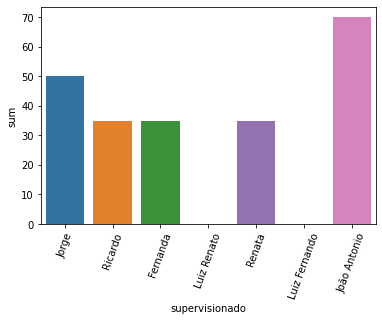

In [7]:
plt.xticks(rotation=70)
sns.barplot(x='supervisionado',y='sum',data=res,)


# ============================================================
## Relatório 3
### Objetivo: Obter relatorio que mostre para cada linha obtida o nome do departamento, o valor individual de cada salario existente no  departamento e a média geral de salarios dentre todos os empregados. Os resultados devem ser apresentados ordenados por departamento.
Código para obtenção do resultado:

In [8]:
res = pd.read_sql_query("""
                  select departamento.nome,salario,(select avg(salario) from empregado) as media_geral
                  from empregado inner join departamento on empregado.depto = departamento.numero
                  order by departamento.nome
                  """,conn)
res

,nome,salario,media_geral
0,Contabilidade,6000.0,3406.25
1,Contabilidade,5500.0,3406.25
2,Contabilidade,3950.0,3406.25
3,Engenharia Civil,3200.0,3406.25
4,Engenharia Civil,1300.0,3406.25
5,Engenharia Civil,2300.0,3406.25
6,Engenharia Mecânica,3000.0,3406.25
7,Engenharia Mecânica,2000.0,3406.25


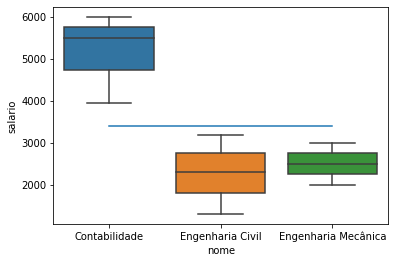

In [9]:
fig,ax=plt.subplots()
media=res.groupby('nome')['media_geral'].mean()
sns.boxplot(y='salario',x='nome',data=res,ax=ax)
sns.lineplot(y=media.values,x=media.index,ax=ax)
plt.show()

# ============================================================
## Relatório 4
### Objetivo: Obter Relatório que mostre as informações relacionadas a todos empregados de empresa (sem excluir ninguém). As linhas resultantes devem conter informações sobre: rg, nome, salario do empregado, data de início do salario atual, nomes dos projetos que participa, quantidade de horas e localização nos referidos projetos, numero e nome dos departamentos aos quais está alocado, informações do historico de salário como inicio, fim, e valores de salarios antigos que foram inclusos na referida tabela (caso possuam informações na mesma), além de todas informações relativas aos dependentes. 
##### Observações: <br> a) perceba que este relatório pode conter linhas com alguns dados repetidos (mas não todos). <br>  b) para os empregados que não possuirem alguma destas informações o valor no registro deve aparecer sem informação/nulo. 
Código para obtenção do resultado:

In [10]:
res = pd.read_sql_query("""
                           select emp.rg, emp.nome, emp.salario, emp.dat_ini_sal	, 
                  
                  ep.horas,  pro.nome as nome_projeto	, pro.localizacao,
                  depto.numero as num_depto,	depto.nome as nome_depto,
                  hs.dat_ini_sal ini_hist,	hs.dat_fim_sal, hs.salario as salario_antigo,
                  dep.codigo as cod_dep,rg_responsavel,	nome_dependente,nascimento,relacao,sexo
                      from empregado emp 
                      left join empregado_projeto  ep
                            on (ep.rg_empregado = emp.rg)
                            left join projeto pro
                            on (ep.numero_projeto = pro.numero)
                            left join departamento depto
                            on (depto.numero = emp.depto)
                            left join historico_salario hs
                            on emp.rg=hs.rg
                            left join dependente dep
                            on emp.rg=dep.rg_responsavel
                            """,conn)
res

,rg,nome,salario,dat_ini_sal,horas,nome_projeto,localizacao,num_depto,nome_depto,ini_hist,dat_fim_sal,salario_antigo,cod_dep,rg_responsavel,nome_dependente,nascimento,relacao,sexo
0,1010,João Luiz,6000.0,2011-05-01,NaN,None,None,1,Contabilidade,2010-01-01,2010-11-30,2000.0,2.0,1010.0,Luiz,1979-11-18,Filho,M
1,1010,João Luiz,6000.0,2011-05-01,NaN,None,None,1,Contabilidade,2010-01-01,2010-11-30,2000.0,1.0,1010.0,Jorge,1986-12-27,Filho,M
2,1010,João Luiz,6000.0,2011-05-01,NaN,None,None,1,Contabilidade,2010-12-01,2011-04-30,4000.0,2.0,1010.0,Luiz,1979-11-18,Filho,M
3,1010,João Luiz,6000.0,2011-05-01,NaN,None,None,1,Contabilidade,2010-12-01,2011-04-30,4000.0,1.0,1010.0,Jorge,1986-12-27,Filho,M
4,2020,Fernanda,5500.0,2008-12-01,25.0,Motor,Rio Claro,1,Contabilidade,2007-05-01,2007-12-31,2500.0,4.0,2020.0,Ângelo,1995-02-10,Filho,M
5,2020,Fernanda,5500.0,2008-12-01,25.0,Motor,Rio Claro,1,Contabilidade,2007-05-01,2007-12-31,2500.0,3.0,2020.0,Fernanda Carla,1969-02-14,Cônjuge,F
6,2020,Fernanda,5500.0,2008-12-01,10.0,Financeiro,São Paulo,1,Contabilidade,2007-05-01,2007-12-31,2500.0,4.0,2020.0,Ângelo,1995-02-10,Filho,M
7,2020,Fernanda,5500.0,2008-12-01,10.0,Financeiro,São Paulo,1,Contabilidade,2007-05-01,2007-12-31,2500.0,3.0,2020.0,Fernanda Carla,1969-02-14,Cônjuge,F
8,2020,Fernanda,5500.0,2008-12-01,25.0,Motor,Rio Claro,1,Contabilidade,2008-01-01,2010-11-30,4000.0,4.0,2020.0,Ângelo,1995-02-10,Filho,M
9,2020,Fernanda,5500.0,2008-12-01,25.0,Motor,Rio Claro,1,Contabilidade,2008-01-01,2010-11-30,4000.0,3.0,2020.0,Fernanda Carla,1969-02-14,Cônjuge,F


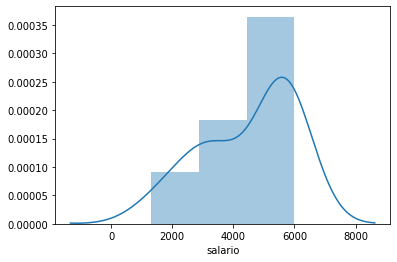

In [11]:
sns.distplot(res['salario'], kde=True);

# ============================================================
## Relatório 5
### Objetivo: Obter a frequencia absoluta e  frequencia relativa da quantidade de cpfs únicos no relatório 4. Apresente os resultados ordenados de forma decrescente pela frequencia relativa.
Código para obtenção do resultado:

In [12]:
res = pd.read_sql_query("""
                           WITH relatorio_completo AS (select * from  (select emp.rg, emp.nome, emp.salario, emp.cpf, emp.depto	, emp.rg_supervisor	, emp.salario	, emp.dat_ini_sal	, 
                  ep.codigo	, ep.rg_empregado	, ep.numero_projeto	, ep.horas, 
                  pro.numero	, pro.nome as nome_projeto	, pro.localizacao,
                  depto.numero as num_depto,	depto.nome as nome_depto,	depto.rg_gerente,	hs.dat_ini_sal ini_hist,	hs.dat_fim_sal, hs.salario as salario_antigo,	dep.codigo as cod_dep,	rg_responsavel,	nome_dependente,	nascimento,	relacao,	sexo
                      from empregado emp 
                      left join empregado_projeto  ep
                            on (ep.rg_empregado = emp.rg)
                            left join projeto pro
                            on (ep.numero_projeto = pro.numero)
                            left join departamento depto
                            on (depto.numero = emp.depto)
                            left join historico_salario hs
                            on emp.rg=hs.rg
                            left join dependente dep
                            on emp.rg=dep.rg_responsavel) as rel_result)

                            select cpf,
				   count(cpf) as frequencia_absoluta,
				   (count(cpf)*100 /(select count(*) from relatorio_completo)::float) as frequencia_relativa
                             from relatorio_completo group by cpf
                             order by frequencia_relativa desc
                            """,conn)
res

,cpf,frequencia_absoluta,frequencia_relativa
0,22222,8,38.095238
1,11111,4,19.047619
2,44444,3,14.285714
3,88888,2,9.523810
4,55555,1,4.761905
5,66666,1,4.761905
6,77777,1,4.761905
7,33333,1,4.761905


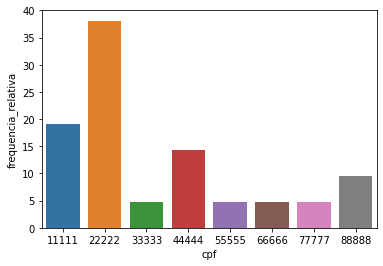

In [13]:
sns.barplot(x='cpf',y='frequencia_relativa', data=res)